# 🚗 **Transport Demand Modeling Project Overview** 🌍

## 📚 **Project Objective:**
The goal of this project is to estimate the demand for public transport based on geospatial data using **Neural Networks**. We'll analyze transport stations data and predict the geographic coordinates of stations using machine learning.

## ⚙️ **Steps Involved:**

### 1. **Data Loading and Preprocessing** 🧹
   - **Dataset**: The dataset used is about transport stations in London, including coordinates and categorical attributes like networks, zones, and night tube information.
   - **Missing Values**: Categorical columns are filled with the mode (most frequent value), and numerical columns are filled with the mean. This ensures that we have complete data for analysis and modeling.
   - **Duplicates**: We check for and remove any duplicate rows to ensure the data is unique and doesn't bias the model.

### 2. **Data Exploration** 🔍
   - **Descriptive Statistics**: We explore the dataset using functions like `.describe()` to summarize the data and gain insights.
   - **Visualization**: We create a **map** of the stations using **Folium** and display **correlation heatmaps** and **histograms** to visualize the relationships between the features.

### 3. **Feature Engineering** 🔧
   - **Categorical Encoding**: We use **LabelEncoder** to convert categorical variables (like 'Network' and 'Zone') into numerical form.
   - **Scaling**: The numerical features are scaled using **StandardScaler** to ensure they are on the same scale for training the model.

### 4. **Neural Network Model** 🧠
   - We define a **Sequential neural network** with layers:
     - **64 neurons** in the first layer, **32 neurons** in the second layer, and **2 output neurons** to predict the coordinates ('x' and 'y').
   - **Activation Function**: **ReLU** is used for hidden layers to add non-linearity, and **Mean Squared Error** is used as the loss function for regression.
   - **Training**: The model is trained for **50 epochs** on the training data, and performance is evaluated on the test data.

### 5. **Saving the Model** 💾
   - After training, we save the model, training history, and **scaler** to use later for predictions and scaling new data.

### 6. **Creating a Dash Web Application** 🌐
   - We build an **interactive dashboard** using **Dash** and **Plotly** to visualize transport station locations on a map.
   - The dashboard allows users to filter the transport demand by **Zone** using a dropdown and displays a **histogram** of transport demand for the selected zone.

## 🛠 **Key Tools and Libraries Used:**
- **Pandas**: Data manipulation and analysis.
- **Matplotlib & Seaborn**: Visualization of data (plots, heatmaps).
- **Scikit-learn**: For machine learning tasks like splitting data, scaling, and encoding.
- **Keras**: For building and training the neural network.
- **Dash**: For creating the interactive web application.

## 🔑 **Key Concepts:**
- **Neural Networks**: Machine learning models inspired by the brain, useful for predicting continuous values like coordinates.
- **Data Scaling**: Standardizing features to improve the performance of machine learning models.
- **Categorical Encoding**: Converting non-numerical data into numbers so that the machine learning model can process it.

## 🚀 **Project Impact:**
By completing this project, you'll understand how to handle real-world data, preprocess it, build and train a neural network, and deploy your model in an interactive web application. This knowledge can be applied to many fields, including urban planning, transport logistics, and more.

---

### 🌟 **Keep Experimenting!**
The beauty of machine learning lies in experimentation. Try tweaking the model, exploring different datasets, or even improving the Dash app with additional features. The possibilities are endless! 🚀

## 📚 **Importing Libraries**
Before we start building the project, we need to import all the necessary libraries. These libraries provide the functions and tools we need for data analysis, machine learning, and building the web application.

- **Pandas**: For data manipulation and handling CSV files.
- **Folium**: For creating interactive maps of transport stations.
- **Matplotlib & Seaborn**: For data visualization, including heatmaps, histograms, and scatter plots.
- **Scikit-learn**: For machine learning tasks like splitting the data, encoding categorical variables, and scaling features.
- **Keras**: For building the neural network model to predict coordinates.
- **Dash & Plotly**: For creating an interactive dashboard that visualizes transport station locations and demand.

In [318]:
import warnings

In [319]:
warnings.filterwarnings('ignore')

In [320]:
# Install required packages

In [321]:
pip install dash pandas plotly scikit-learn

In [322]:
!pip install dash-bootstrap-components

In [323]:
# Importing required libraries

In [324]:
import pandas as pd

In [325]:
import folium

In [326]:
import seaborn as sns

In [327]:
import matplotlib.pyplot as plt

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [330]:
from keras.models import Sequential

In [331]:
from keras.layers import Dense

In [332]:
import joblib

In [333]:
import dash

In [334]:
from dash import dcc, html

In [335]:
import plotly.express as px

In [336]:
import dash_bootstrap_components as dbc

In [337]:
from dash.dependencies import Input, Output

## 🧹 **Loading and Preprocessing the Dataset**
We start by loading the dataset using `pandas.read_csv`. This allows us to load data from the CSV file into a DataFrame.

**Key steps in preprocessing**:
- **Checking for Missing Values**: We check for missing values using `isnull().sum()` and handle them by filling missing values in categorical columns with the most frequent value (mode), and in numerical columns with the mean.
- **Removing Duplicates**: We check for duplicate rows using the `duplicated()` method and ensure that there are no repeated records.
- **Imputation**: Imputation fills missing data with calculated values, ensuring that the dataset is complete and ready for machine learning modeling.

In [338]:
# Load the dataset

In [339]:
file_path = '/content/Stations_20220221.csv'

In [340]:
df = pd.read_csv(file_path)

In [341]:
# Display the first few rows of the dataset

In [342]:
print("Head of the dataset:")
print(df.head())

Head of the dataset:
   NLC                         NAME  EASTING  NORTHING  \
0  500                   Acton Town   519478    179592   
1  501                     Barbican   532004    181856   
2  502                      Aldgate   533613    181262   
3  503                 Aldgate East   533936    181375   
4  504  Stratford International DLR   538128    184761   

                                      LINES             NETWORK  \
0                      District, Piccadilly  London Underground   
1  Circle, Hammersmith & City, Metropolitan  London Underground   
2                      Circle, Metropolitan  London Underground   
3              District, Hammersmith & City  London Underground   
4                                       DLR                 NaN   

  London Underground Elizabeth Line London Overground  DLR Zone         x  \
0                Yes            NaN               NaN  NaN    3 -0.278433   
1                Yes            NaN               NaN  NaN    1 -0.097190

In [343]:
# Display descriptive statistics

In [344]:
print("\nDescription of the dataset:")
print(df.describe())


Description of the dataset:
               NLC        EASTING       NORTHING           x           y
count   471.000000     471.000000     471.000000  471.000000  471.000000
mean   2456.942675  528978.840764  182058.785563   -0.141021   51.522177
std    3029.113960   11494.482354    7388.183452    0.165456    0.066437
min     500.000000  471527.000000  162244.000000   -0.971878   51.341957
25%     618.500000  524046.000000  178815.500000   -0.210827   51.494068
50%     747.000000  530196.000000  181837.000000   -0.123168   51.519961
75%    3175.000000  536031.500000  186374.500000   -0.040401   51.560653
max    9846.000000  561361.000000  202316.000000    0.331671   51.704742


In [345]:
# Display info about the dataset (datatypes and non-null counts)

In [346]:
print("\nInfo about the dataset:")
print(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NLC                 471 non-null    int64  
 1   NAME                471 non-null    object 
 2   EASTING             471 non-null    int64  
 3   NORTHING            471 non-null    int64  
 4   LINES               471 non-null    object 
 5   NETWORK             309 non-null    object 
 6   London Underground  270 non-null    object 
 7   Elizabeth Line      41 non-null     object 
 8   London Overground   113 non-null    object 
 9   DLR                 45 non-null     object 
 10  Zone                471 non-null    object 
 11  x                   471 non-null    float64
 12  y                   471 non-null    float64
 13  Night Tube?         471 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 51.6+ KB
None


In [347]:
# Check for missing values

In [348]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
NLC                     0
NAME                    0
EASTING                 0
NORTHING                0
LINES                   0
NETWORK               162
London Underground    201
Elizabeth Line        430
London Overground     358
DLR                   426
Zone                    0
x                       0
y                       0
Night Tube?             0
dtype: int64


In [349]:
# Check for duplicate rows

In [350]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [351]:
# Fill missing values in categorical columns with the mode (most frequent value)


In [352]:
categorical_cols = ['NETWORK', 'Night Tube?', 'Zone', 'London Underground', 'Elizabeth Line']


In [353]:
numerical_cols = ['EASTING', 'NORTHING', 'x', 'y']

In [354]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [355]:
# Fill missing values in numerical columns with the mean

In [356]:
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [357]:
# Verify if there are still any missing values

In [358]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
NLC                     0
NAME                    0
EASTING                 0
NORTHING                0
LINES                   0
NETWORK                 0
London Underground      0
Elizabeth Line          0
London Overground     358
DLR                   426
Zone                    0
x                       0
y                       0
Night Tube?             0
dtype: int64


## 🔍 **Data Exploration and Visualization**
Before training the model, we explore the dataset to understand the data better and look for any patterns or correlations.

**Key Steps**:
- **Descriptive Statistics**: We use `describe()` to generate summary statistics (e.g., mean, standard deviation) for numerical columns, helping us understand the distribution of data.
- **Correlation Heatmap**: We calculate the correlation between numerical features using `corr()`. This gives insight into how strongly features are related to each other, helping with feature selection.
- **Histograms**: Histograms are created to visualize the distribution of numerical variables, providing insight into the data’s spread.
- **Scatter Plots**: Scatter plots of the geographical coordinates help us visualize the clustering of transport stations by different networks.

In [359]:
# Create a map centered around the median latitude and longitude of the stations


In [360]:
map_center = [df['y'].median(), df['x'].median()]

In [361]:
m = folium.Map(location=map_center, zoom_start=12)

In [362]:
# Add markers for each station

In [363]:
for index, row in df.iterrows():
    folium.Marker(location=[row['y'], row['x']], popup=row['NAME']).add_to(m)


In [364]:
# Display the map

In [365]:
m.save('/content/stations_map.html')

In [366]:
# Data visualization

In [367]:
# Correlation Heatmap

In [368]:
numerical_df = df[['EASTING', 'NORTHING', 'x', 'y']]

In [369]:
corr = numerical_df.corr()

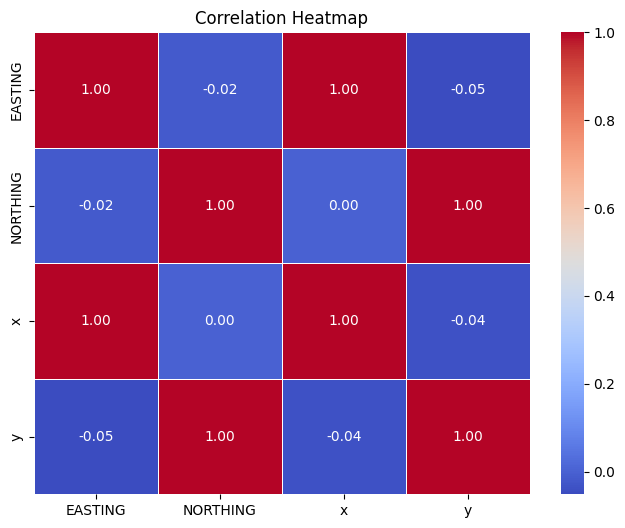

In [370]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [371]:
# Histograms of numerical variables

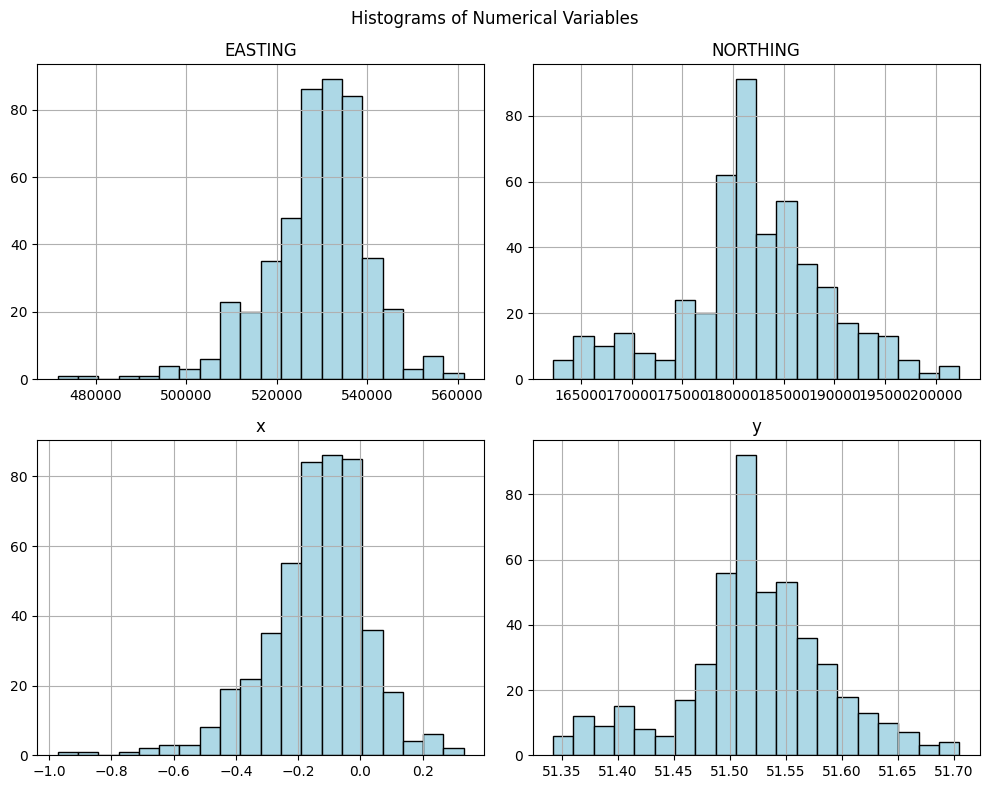

In [372]:
numerical_df.hist(figsize=(10, 8), bins=20, color='lightblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.tight_layout()
plt.show()

In [373]:
# Average coordinates by network

In [374]:
network_groups = df.groupby('NETWORK').agg({'x': 'mean', 'y': 'mean'}).reset_index()


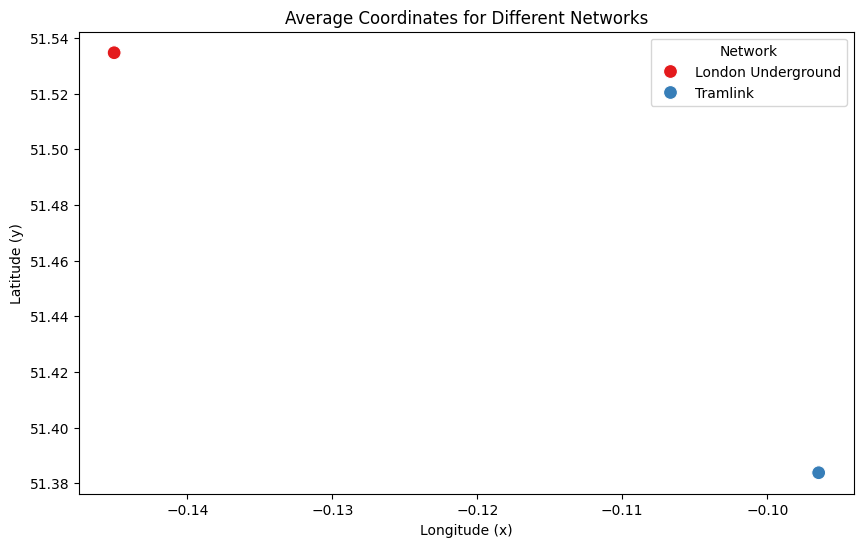

In [375]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=network_groups, x='x', y='y', hue='NETWORK', palette='Set1', s=100)
plt.title('Average Coordinates for Different Networks')
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (y)')
plt.legend(title='Network')
plt.show()

## 🔧 **Feature Engineering**
In this step, we prepare the data for training by performing the following tasks:
  
**Key Steps**:
- **Categorical Encoding**: Categorical columns, such as 'Network' and 'Zone', are converted into numerical values using **LabelEncoder**. This makes the data suitable for machine learning algorithms that require numerical input.
- **Scaling**: Numerical features like 'EASTING', 'NORTHING', 'x', and 'y' are scaled using **StandardScaler** to normalize the data. This step ensures that the features are on the same scale, which helps with model convergence and accuracy.
- **Splitting the Data**: We split the data into training and testing sets using `train_test_split()`. The training set is used to train the model, and the testing set is used to evaluate the model’s performance.

In [376]:
# Machine Learning Model

In [377]:
# Encode categorical variables using LabelEncoder

In [378]:
label_cols = ['NETWORK', 'Night Tube?', 'Zone']

In [379]:
encoder = LabelEncoder()

In [380]:
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

In [381]:
# Select features and target

In [382]:
X = df[['EASTING', 'NORTHING', 'x', 'y', 'Night Tube?', 'NETWORK', 'Zone']]


In [383]:
y = df[['x', 'y']]  # Target variable (predicting the 'x' and 'y' coordinates)


In [384]:
# Scale numerical features

In [385]:
scaler = StandardScaler()

In [386]:
X[['EASTING', 'NORTHING', 'x', 'y']] = scaler.fit_transform(X[['EASTING', 'NORTHING', 'x', 'y']])


In [387]:
# Split the dataset into training and testing sets

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🧠 **Building and Training the Neural Network**
In this step, we build a neural network model using **Keras**. The model will predict the geographical coordinates of transport stations based on other features.

**Key Steps**:
- **Model Architecture**: We define a **Sequential model** with two hidden layers. The first layer has 64 neurons, the second layer has 32 neurons, and the output layer has 2 neurons (one for predicting 'x' and one for 'y' coordinates).
- **Activation Function**: We use the **ReLU** activation function for the hidden layers to introduce non-linearity. This helps the network learn more complex patterns.
- **Loss Function**: We use **Mean Squared Error (MSE)** as the loss function, as this is a regression problem where we predict continuous values (coordinates).
- **Training the Model**: The model is trained for 50 epochs using the **Adam optimizer**. During training, we monitor the validation loss to prevent overfitting.

In [389]:
# Define and train the neural network model

In [390]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # Output layer for predicting 'x' and 'y'
])

In [391]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [392]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 1322.1948 - val_loss: 1261.1133
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1254.6438 - val_loss: 1186.7797
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1187.7721 - val_loss: 1102.2844
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1116.7910 - val_loss: 1001.4995
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1012.8696 - val_loss: 878.8127
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 908.2861 - val_loss: 738.4572
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 789.3563 - val_loss: 587.3267
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 600.9791 - val_loss: 437.5762
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 478.7317 - val_loss: 313.8560
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 391.0231 - val_loss: 234.5345
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 288.3835 - val_loss: 203.2729
Epoch 12/50
12/

## 🧪 **Evaluating the Model**
After training the model, we evaluate its performance using the testing data. This step helps us understand how well the model generalizes to new, unseen data.

**Key Steps**:
- **Test Loss**: We use the `evaluate()` method to calculate the test loss, which indicates how well the model predicts the coordinates ('x' and 'y') on the testing data. A lower loss indicates better performance.
- **Interpretation**: If the test loss is high, we may need to tune the model, adjust the features, or perform further preprocessing to improve the results.

In [393]:
# Evaluate the model

In [394]:
test_loss = model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7476 


In [395]:
print(f'Test Loss: {test_loss}')

Test Loss: 3.652839183807373


## 💾 **Saving the Model and Artifacts**
Once the model is trained and evaluated, we save the trained model and important components like the scaler and training history for future use.

**Key Steps**:
- **Saving the Model**: The trained model is saved using `model.save()`. This allows us to load the model later and use it for making predictions on new data.
- **Saving the Scaler**: The **StandardScaler** used to scale the features is saved using `joblib.dump()`. This ensures that we can scale new data consistently when making predictions in the future.
- **Saving the Training History**: The model’s training history, including loss and accuracy for each epoch, is saved in a CSV file to analyze the training process and monitor model performance over time.

In [396]:
# Save the model, training history, and scaler

In [397]:
model.save('/content/transport_demand_model.h5')

In [398]:
history_df = pd.DataFrame(history.history)

In [399]:
history_df.to_csv('/content/transport_demand_training_history.csv', index=False)


In [400]:
joblib.dump(scaler, '/content/scaler.pkl')

['/content/scaler.pkl']

## 🌐 **Building the Dash Web Application**
The final step is to create an interactive web application using **Dash** that allows users to visualize the transport station data and demand.

**Key Steps**:
- **Map Visualization**: We create an interactive map using **Plotly** and **Dash**, displaying the geographic locations of transport stations.
- **Dropdown for Zones**: The app includes a dropdown menu for users to select a transport zone, which dynamically updates a histogram showing the transport demand for that zone.
- **Layout and Callback**: We define the layout of the web app, including the map and the demand graph. A callback function updates the demand graph based on the selected zone, making the app interactive and engaging.

In [401]:
# Dash Web Application

In [402]:
# Initialize the Dash app

In [403]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [404]:
# Clean numeric columns by removing commas and converting to float

In [405]:
numeric_columns = ['EASTING', 'NORTHING', 'x', 'y']

In [406]:
for col in numeric_columns:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

In [407]:
# Encode categorical columns as numeric (0 or 1)

In [408]:
df['London Underground'] = df['London Underground'].map({'Yes': 1, 'No': 0})


In [409]:
df['Elizabeth Line'] = df['Elizabeth Line'].map({'Yes': 1, 'No': 0})

In [410]:
df['Night Tube?'] = df['Night Tube?'].map({'Yes': 1, 'No': 0})

In [411]:
# Prepare a scatter plot for stations

In [412]:
map_fig = px.scatter_geo(df, lat='y', lon='x', hover_name='NLC', title='Transport Stations')


In [413]:
# Dashboard layout

In [414]:
app.layout = html.Div([
    dbc.Row([dbc.Col(html.H1("Interactive Transport Demand Dashboard"), width=12)]),
    dbc.Row([dbc.Col(dcc.Graph(figure=map_fig), width=12)]),
    dbc.Row([dbc.Col(
        html.Div([
            html.H4("Transport Demand by Zone"),
            dcc.Dropdown(
                id='zone-dropdown',
                options=[{'label': zone, 'value': zone} for zone in df['Zone'].unique()],
                value=df['Zone'].unique()[0]
            ),
            dcc.Graph(id='zone-demand-graph')
        ]), width=12
    )])
])

In [415]:
# Define callback to update the demand graph based on the selected zone

In [416]:
@app.callback(
    Output('zone-demand-graph', 'figure'),
    Input('zone-dropdown', 'value')
)
def update_graph(selected_zone):
    filtered_df = df[df['Zone'] == selected_zone]
    demand_fig = px.histogram(filtered_df, x='London Underground', title=f"Transport Demand for Zone {selected_zone}")
    return demand_fig

In [417]:
# Run the app

In [418]:
app.run_server(debug=True, use_reloader=False)

<IPython.core.display.Javascript object>

## 🎉 **Conclusion**
This project demonstrates how machine learning can be used for transport demand modeling and geospatial analysis. By using neural networks, we were able to predict the geographical coordinates of transport stations based on various features.

In summary, the key takeaways are:
- **Data Preprocessing**: Proper handling of missing values, encoding of categorical features, and scaling of numerical values are crucial for building a successful model.
- **Modeling**: We built and trained a neural network to predict continuous variables (coordinates) and evaluated its performance using Mean Squared Error (MSE).
- **Visualization**: The interactive **Dash** web application provided an engaging way to visualize the transport stations and demand across different zones.
- **Deployment**: By saving the model, scaler, and training artifacts, we ensured that the model can be reused for future predictions without retraining.

This project provides a foundation for future work in transportation systems optimization and demand forecasting. By extending the model and incorporating more features, we can further improve predictions and build even more advanced applications in urban planning and transportation management. 🚀